In [11]:
import librosa
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import numpy as np
import soundfile as sf

def get_convolved_signal(dry_audio, ir):
    wet_audio = fftconvolve(dry_audio, ir, mode="full")
    wet_audio = wet_audio / np.max(np.abs(wet_audio))
    print(f"dry audio shape = {dry_audio.shape}\ndry audio sample rate = {dry_audio_sr}\nimpulse response shape = {ir.shape}")
    print(f"wet_audio shape = {wet_audio.shape}")
    return wet_audio

def read_npy_array(arr):
    return np.load(arr)
    
def get_r(x):
    r = np.convolve(x, x, mode="full")
    return r[len(r)//2:]

def get_R(r, order):
    R = np.zeros((order, order))
    for i in range(order):
        for j in range(order):
            R[i, j] = r[abs(i-j)]
    return R

def get_p(r, order):
    p = np.zeros(order)
    for i in range(order):
        p[i] = r[i + 1]
    return p

def get_w(R, p):
    return np.linalg.solve(R, p)

def solve_wiener(r, order):
    R = get_R(r, order)
    p = get_p(r, order)
    return get_w(R, p)

def apply_fep(signal, weights):
    num_ws = len(weights)
    predictor = np.zeros(len(signal))
    error = np.zeros(len(signal))

    for n in range(num_ws, len(signal)):
        predictor[n] = np.dot(weights, signal[n-num_ws:n][::-1])
        error[n] = signal[n] - predictor[n]

    return predictor, error

#### ------------------------------------ DATA PROCESSING ------------------------------------------------------

In [18]:
dry_audio_path = "/workspace/unicamp/IA009/Projeto Final/LibriSpeech/dev-clean/251/118436/251-118436-0000.flac"
ir_path = "/workspace/unicamp/IA009/Projeto Final/sports-centre-university-york/sports-centre-university-york/stereo/sportscentre_ortf.wav"
dry_audio, dry_audio_sr = librosa.load(dry_audio_path)
dry_audio = dry_audio / np.max(np.abs(dry_audio))
ir, ir_sr = librosa.load(ir_path)
ir = ir[:50000]
wet_audio = np.convolve(ir, dry_audio, mode="full")
wet_audio = wet_audio / np.max(np.abs(wet_audio))

#### ------------------------------------ SIGNAL PLOTS ------------------------------------------------------

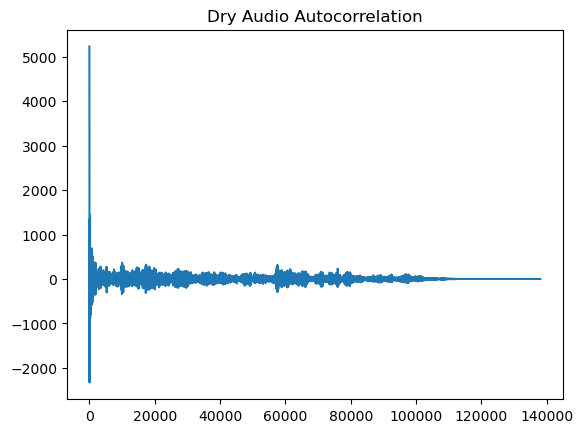

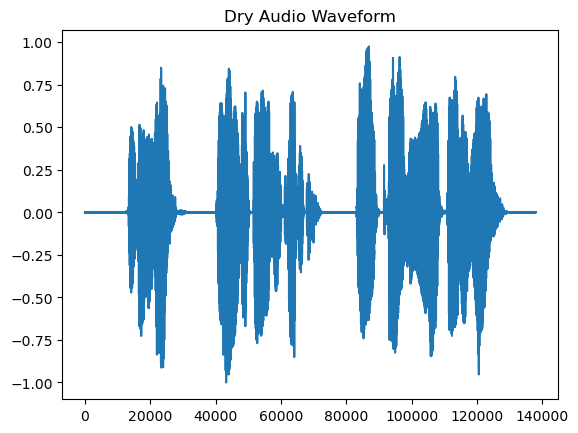

In [19]:
dry_audio_corr = np.correlate(dry_audio, dry_audio, mode="full")
dry_audio_corr = dry_audio_corr[len(dry_audio_corr)//2:]
plt.plot(dry_audio_corr)
plt.title("Dry Audio Autocorrelation")
plt.show()

plt.plot(dry_audio)
plt.title("Dry Audio Waveform")
plt.show()

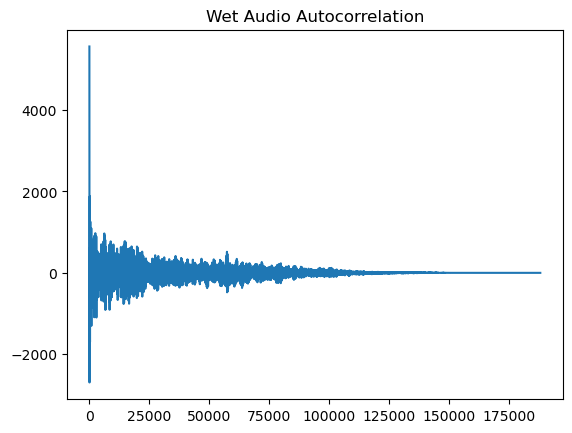

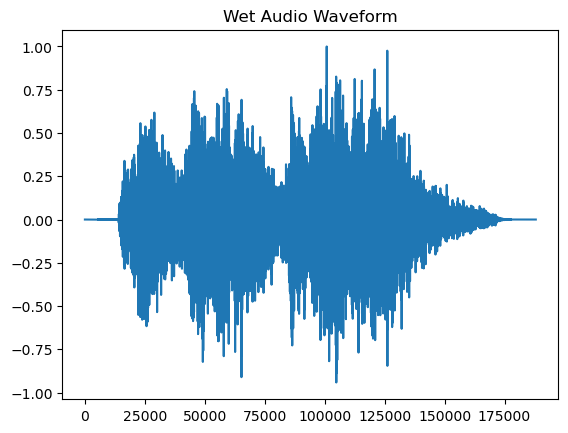

In [20]:
wet_audio_corr = np.correlate(wet_audio, wet_audio, mode="full")
wet_audio_corr = wet_audio_corr[len(wet_audio_corr)//2:]
plt.plot(wet_audio_corr)
plt.title("Wet Audio Autocorrelation")
plt.show()

plt.plot(wet_audio)
plt.title("Wet Audio Waveform")
plt.show()

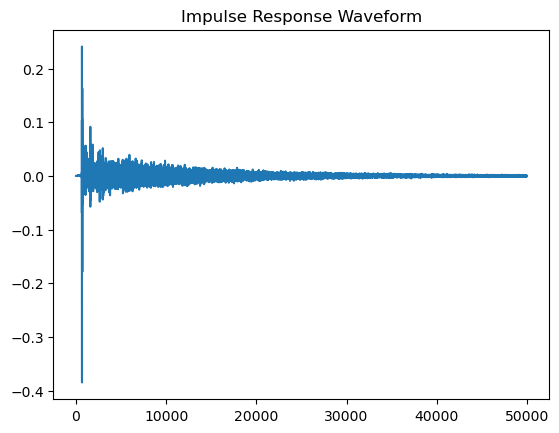

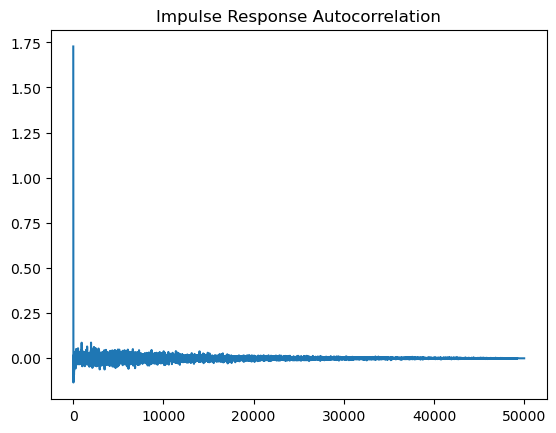

In [21]:
ir_autocorr = np.correlate(ir, ir, mode="full")
ir_autocorr = ir_autocorr[len(ir_autocorr)//2:]
plt.plot(ir)
plt.title("Impulse Response Waveform")
plt.show()

plt.plot(ir_autocorr)
plt.title("Impulse Response Autocorrelation")
plt.show()

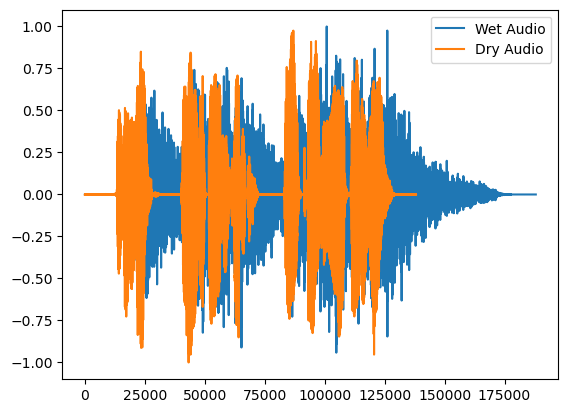

: 

In [45]:
error_audio = (wet_audio[:len(dry_audio)] - dry_audio)**2
plt.plot(wet_audio, label="Wet Audio")
plt.plot(dry_audio, label="Dry Audio")
# plt.plot(error_audio, label = "Error Signal")
plt.legend()